<a href="https://colab.research.google.com/github/MarianaFMattos/Projeto-Pandas/blob/main/Ana%CC%81lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [4]:
dados = pd.read_csv('/content/dados.csv')

### Visualize o conteúdo do DataFrame

In [5]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [6]:
dados.Renda.min()

0

In [7]:
dados.Renda.max()

200000

In [8]:
classes = [0, 1576, 3940, 11820, 19700, 200000 ]

In [9]:
#classes = [dados.Renda.min(), 2 * 788, 5 * 788, 15 * 788, 25 * 788, dados.Renda .max()]

### 2º Definir os labels das classes

In [10]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [11]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda,
                                    bins = classes,
                                    labels = labels,
                                    include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [12]:
percentual = pd.value_counts(pd.cut(x = dados.Renda,
                                    bins = classes,
                                    labels = labels,
                                    include_lowest = True),
                             normalize = True) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [13]:
dist_freq_renda = pd.DataFrame({'Frequencia' : frequencia, 'Porcentagem(%)': percentual})
dist_freq_renda

,Frequencia,Porcentagem(%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

In [14]:
dist_freq_renda.sort_index(ascending = False)

,Frequencia,Porcentagem(%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


<Axes: >

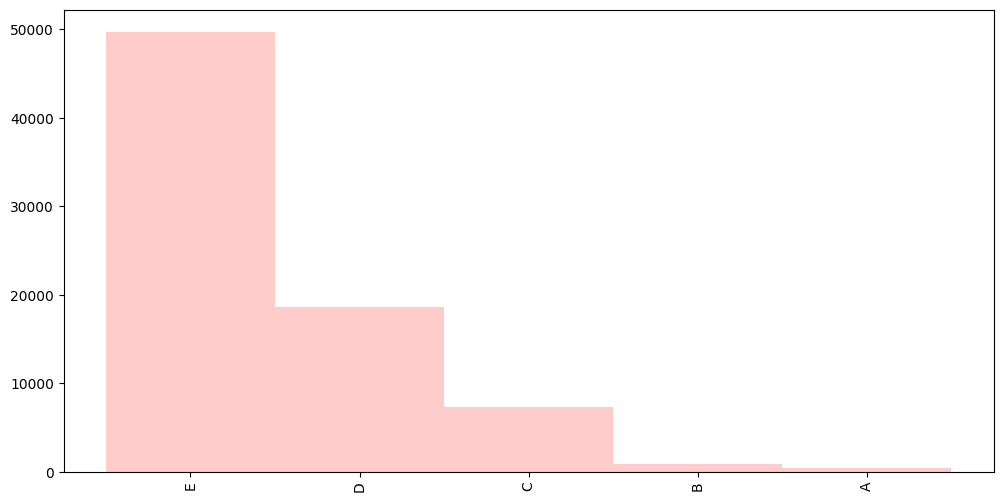

In [15]:
dist_freq_renda['Frequencia'].plot.bar(width = 1, color = 'red', alpha = 0.2, figsize = (12, 6))

> ### Conclusões

A maior parte da população estudada recebe até dois salários mínimos. Uma pequena parcela recebe mais de 5 salários e uma minúscula parcela recebe mais do que 25 salários, isto demostra a desigualdade social.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [16]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<ipython-input-17-64752a16d41b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Density'>

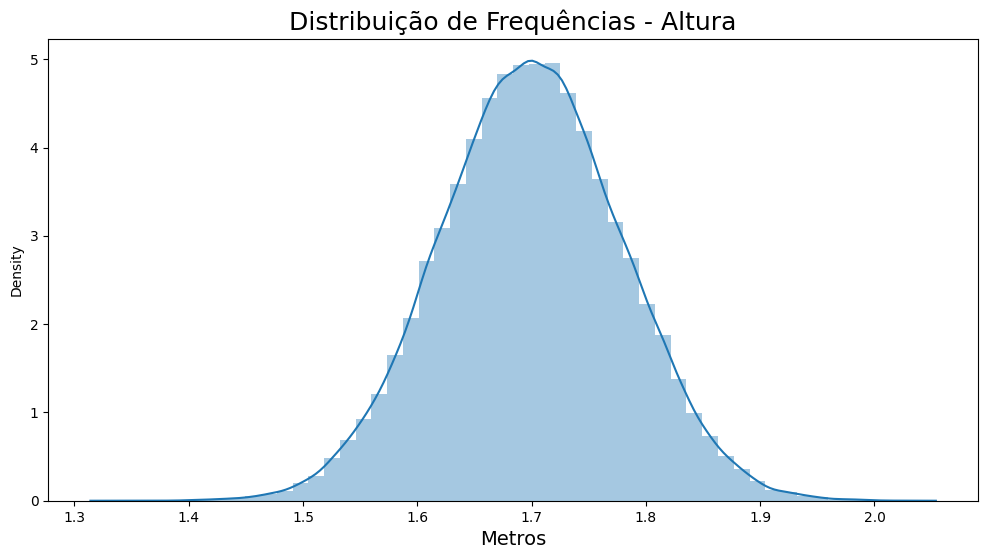

In [17]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

<ipython-input-18-2ab97598167c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade)


<Axes: title={'center': 'Distribuição de Frequências - Idade'}, xlabel='Anos', ylabel='Density'>

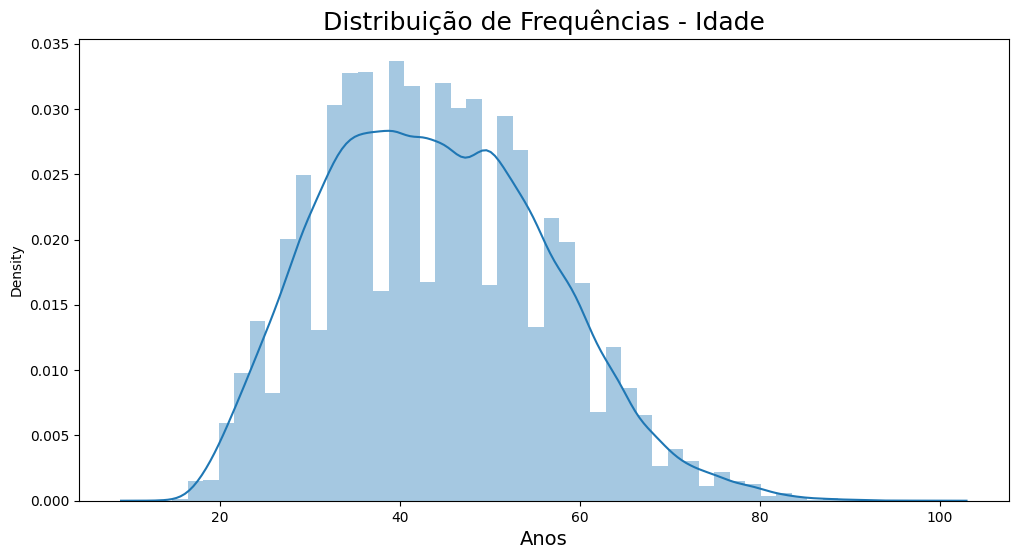

In [18]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Idade', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax

<ipython-input-19-b8ab9b0a740d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Renda'])


<Axes: title={'center': 'Distribuição de Frequências - Renda'}, xlabel='R$', ylabel='Density'>

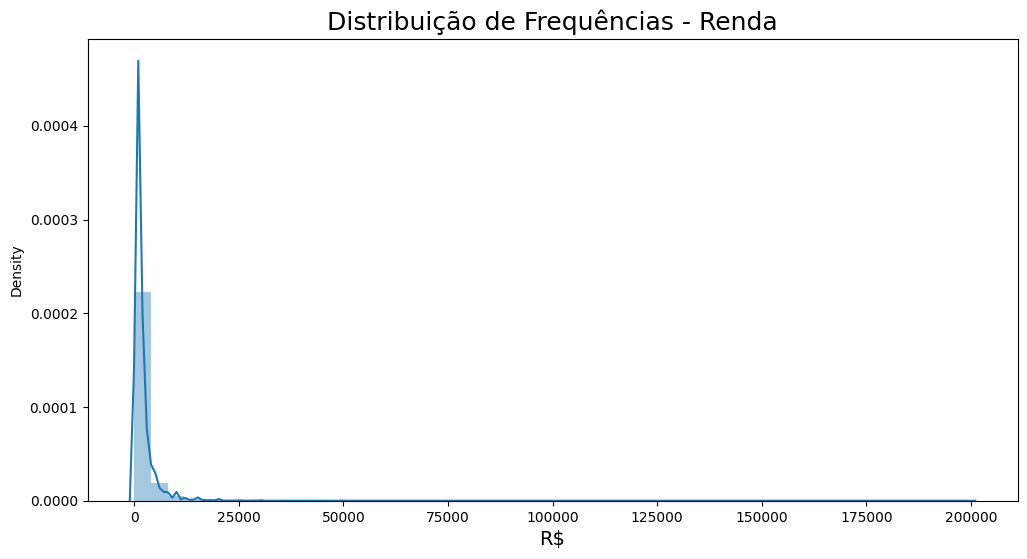

In [19]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

> ### Conclusões

A distribuição das frequencias da variável Altura é simétrica, provavelmente porque foi uma variável criada. Ja a distribuição das frequencias da variável Idade tem picos e vales, e da variável Renda é assimétrica.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-34-01673098be09>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda)


<Axes: title={'center': 'Distribuição de Frequências - Renda até 20.000 R$'}, xlabel='R$', ylabel='Density'>

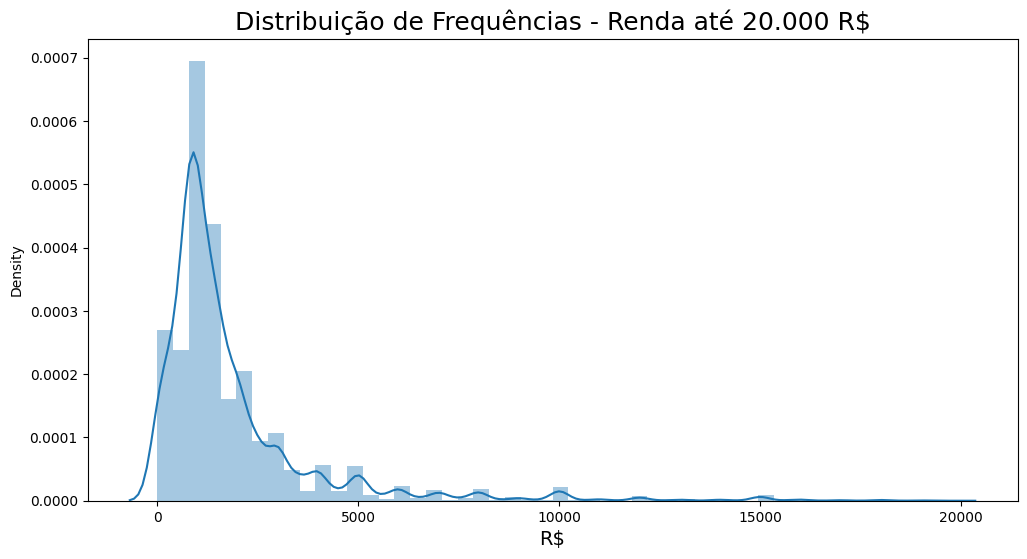

In [34]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda até 20.000 R$', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [44]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [45]:

frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [46]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

A maioria das pessoas se declarou pardos e brancos. Em todas as 'cores' declaradas, aproximadamente metade das pessoas são do sexo masculino e metade são do sexo feminino. Provavelmente porque nestes dados, só os chefes das famílias foram considerados.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [24]:
media = dados.Renda.mean()
media

2000.3831988547631

### Obtenha a mediana

In [25]:
mediana = dados.Renda.median()
mediana

1200.0

### Obtenha a moda

In [36]:
moda = dados.Renda.mode()[0]
moda

788

### Obtenha o desvio médio absoluto

In [27]:
desvio_absoluto = dados.Renda.mad()
desvio_absoluto

<ipython-input-27-bf2794acc013>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto = dados.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [28]:
variancia = dados.Renda.var()
variancia

11044906.006217021

### Obtenha o desvio-padrão

In [29]:
desvio_padrao = dados.Renda.std()
desvio_padrao

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [40]:
Renda_estatistica_por_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo, aggfunc = ['mean', 'median', 'max'],  values = dados.Renda)
Renda_estatistica_por_sexo_cor.rename(index = cor, inplace = True)
Renda_estatistica_por_sexo_cor.rename(columns = sexo, inplace = True)
Renda_estatistica_por_sexo_cor

mean                 median                max         
Sexo        Masculino     Feminino Masculino Feminino Masculino Feminino
Cor                                                                     
Indígena  1081.710938  2464.386139     797.5    788.0     10000   120000
Branca    2925.744435  2109.866750    1700.0   1200.0    200000   100000
Preta     1603.861687  1134.596400    1200.0    800.0     50000    23000
Amarela   4758.251064  3027.341880    2800.0   1500.0     50000    20000
Parda     1659.577425  1176.758516    1200.0    800.0    100000    30000

> ### Conclusões

A população Branca masculina recebe as maiores rendas. Os homens ganham mais que as mulheres em quase todas as etnias, menos na indígena.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [41]:
Renda_dispersao_por_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo, aggfunc = {'mad', 'var', 'std'},  values = dados.Renda)
Renda_dispersao_por_sexo_cor.rename(index = cor, inplace = True)
Renda_dispersao_por_sexo_cor.rename(columns = sexo, inplace = True)
Renda_dispersao_por_sexo_cor

<ipython-input-41-7ef24efd2d1e>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  Renda_dispersao_por_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo, aggfunc = {'mad', 'var', 'std'},  values = dados.Renda)
<ipython-input-41-7ef24efd2d1e>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  Renda_dispersao_por_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo, aggfunc = {'mad', 'var', 'std'},  values = dados.Renda)
<ipython-input-41-7ef24efd2d1e>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  Renda_dispersao_por_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo, aggfunc = {'mad', 'var', 'std'},  values = dados.Renda)
<ipython-input-41-7ef24efd2d1e>:1: FutureWarni

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

A população Branca masculina recebe as maiores rendas. Os homens ganham mais que as mulheres em quase todas as etnias, menos na indígena.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda por Sexo e Cor'}, xlabel='R$', ylabel='Cor'>

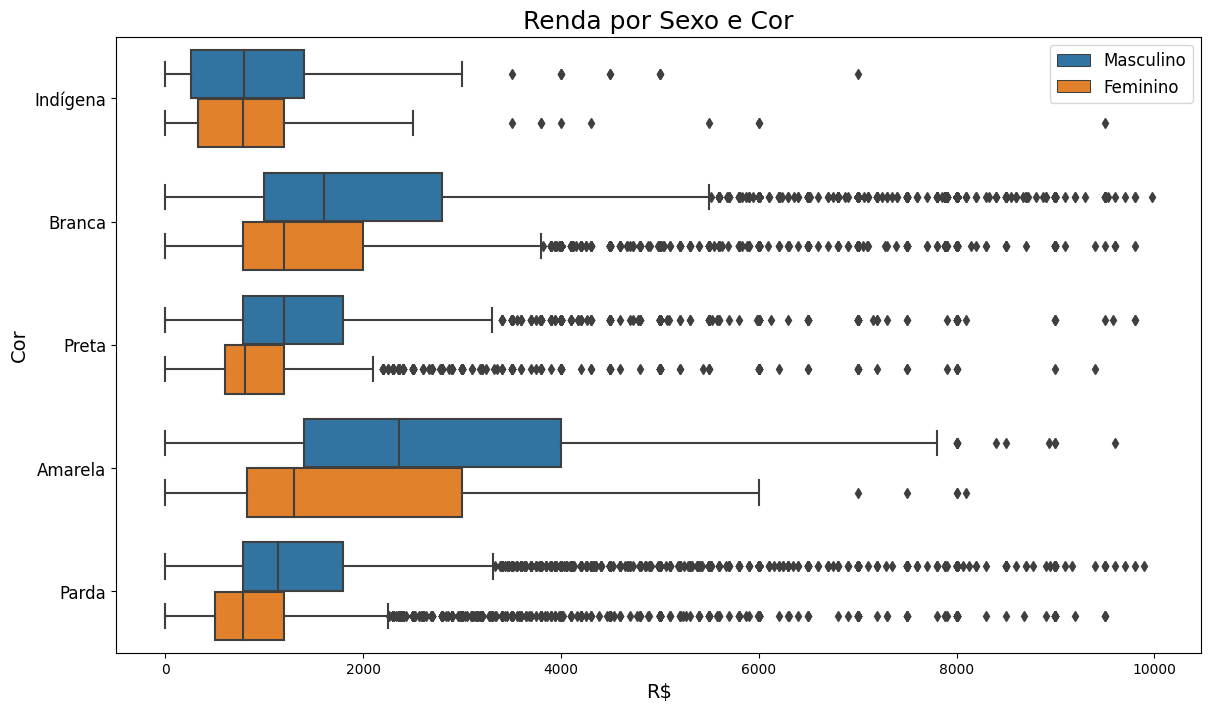

In [52]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(14, 8) # Personalisando o tamanho da figura

ax.set_title('Renda por Sexo e Cor', fontsize = 18) # Configurando o título

ax.set_xlabel('R$', fontsize = 14) # Configurando o label do eixo x

ax.set_ylabel('Cor', fontsize = 14) # Configurando o label do eixo y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize = 12)


# Configurações da legenda do gráfico (sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [53]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print('{0:.2f}%'.format(percentual))


28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [54]:
valor = dados.Renda.quantile(0.99)
print('R${0:2f}'.format(valor))

R$15000.000000


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [55]:
Renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'], dados.Sexo,  aggfunc = ['mean', 'median', 'max', 'std'],  values = dados.Renda).round(2)
Renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
Renda_estatisticas_por_sexo_e_estudo.rename(columns = sexo, inplace = True)
Renda_estatisticas_por_sexo_e_estudo

mean             median           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
Não determinados                 1295.76   798.17      1200      788   

                                     max                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     30000    10000   1023.90   639.31  
1 ano                              30000     2000   1331.95   425.29  
2 anos                             40000     4000   1435.17   498.23  
3 anos                             80000     3500   2143.80   424.12  
4 anos                             50000    10000   1419.82   629.55  
5 anos                             35000     8000   1484.65   635.78  
6 anos                             25000     6000   1476.63   574.55  
7 anos                             40000     9000   1419.71   602.04  
8 anos                             30000    18000   1515.58   896.78  
9 anos                             60000    20000   2137.66   973.22  
10 anos                            45000     6000   2078.61   620.61  
11 anos                           200000   100000   2676.54  1819.04  
12 anos                            30000   120000   2268.08  4851.83  
13 anos                            25000    20000   2797.12  2053.79  
14 anos                            50000    20000   3987.21  2064.08  
15 anos ou mais                   200000   100000   7447.61  4212.77  
Não determinados                    7000     3000    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [58]:
[key for key in anos_de_estudo.values()]

['Sem instrução e menos de 1 ano',
 '1 ano',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 'Não determinados']

<Axes: title={'center': 'Renda por sexo e anos de estudo'}, xlabel='R$', ylabel='Anos de Estudo'>

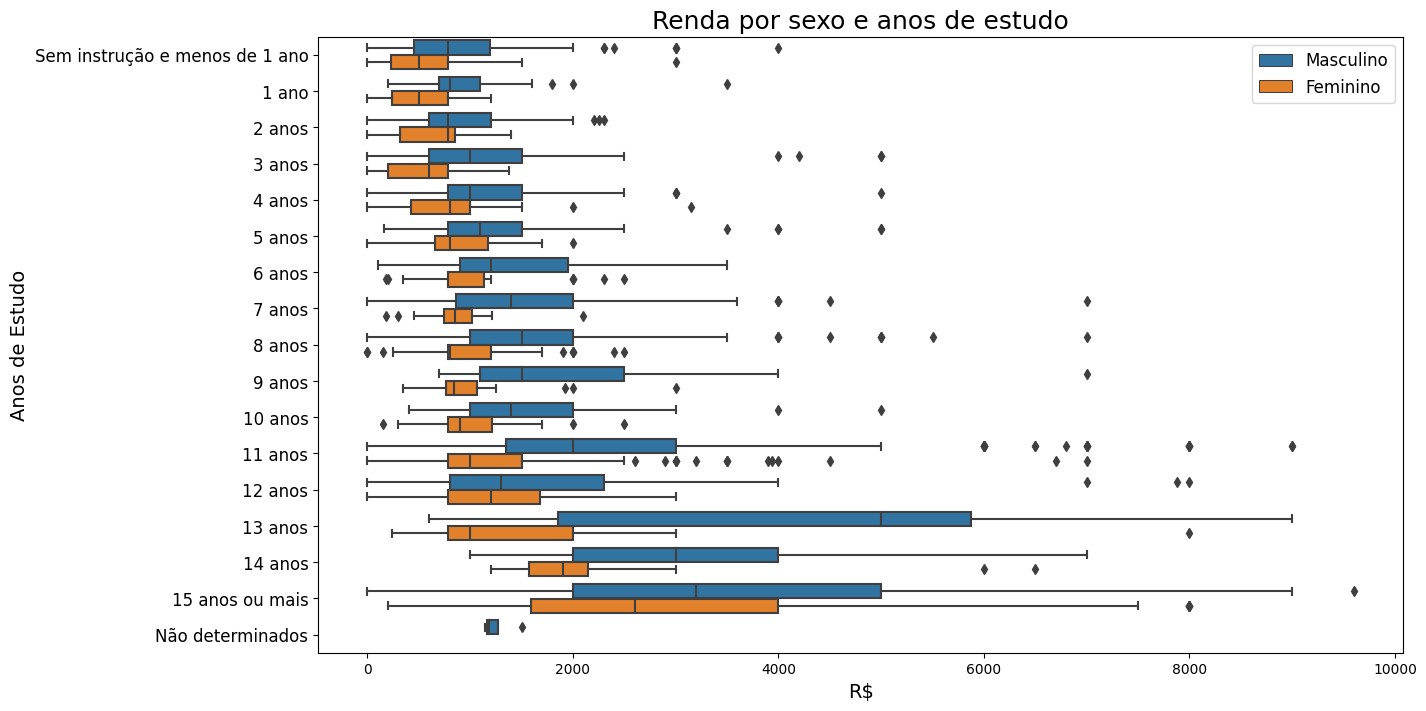

In [56]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'), orient = 'h')

ax.figure.set_size_inches(14, 8)

ax.set_title('Renda por sexo e anos de estudo', fontsize = 18)

ax.set_xlabel('R$', fontsize = 14)

ax.set_ylabel('Anos de Estudo', fontsize = 14)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12) # Configurando cada categoria do eixo y

# Configurações da legenda
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [61]:
renda_estatisticas_por_uf = dados.groupby('UF').agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)


Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

AttributeError: ignored

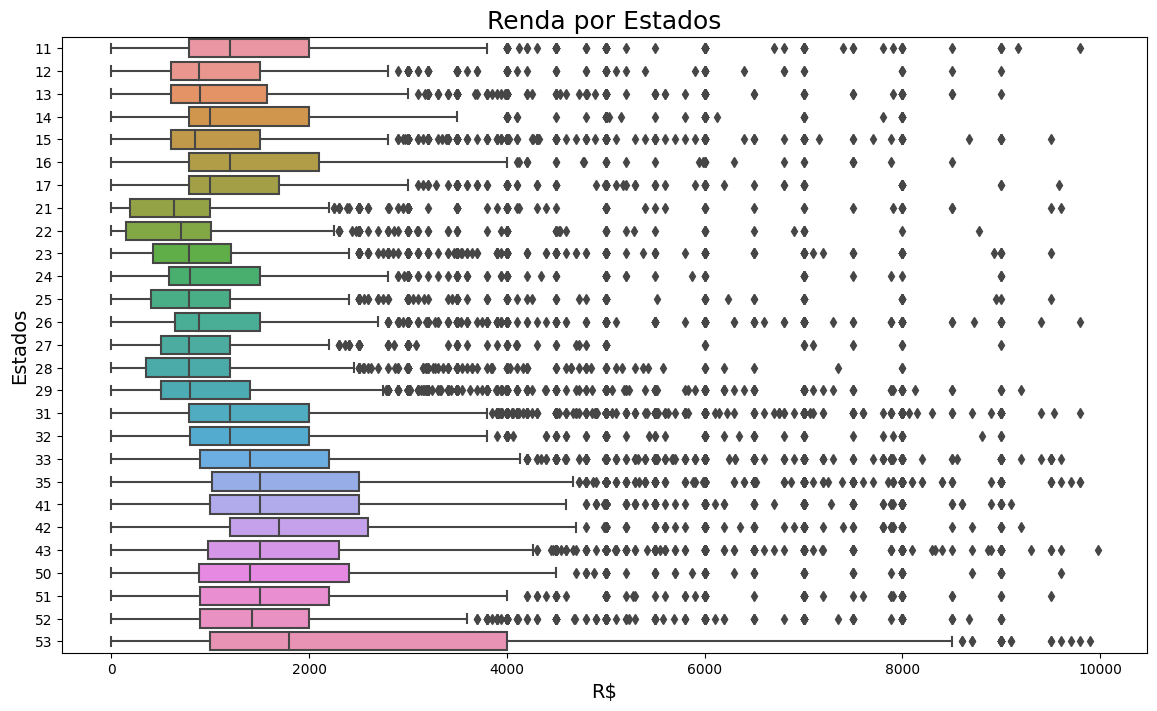

In [62]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h',)

ax.figure.set_size_inches(14, 8)

ax.set_title('Renda por Estados', fontsize = 18)

ax.set_xlabel('R$', fontsize = 14)

ax.set_ylabel('Estados', fontsize = 14)
ax.set_sticklabels([key for key in uf.values()], fontsize = 12)

ax

> ### Conclusões

Escreva suas conclusões aqui...